In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error, r2_score


Using TensorFlow backend.


In [2]:
print("Num GPUs avaliable: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Keras Version " + keras.__version__)
print("TF Version " + tf.__version__)
print("Numpy Version " + np.__version__)
print("Pandas Version " + pd.__version__)
print("Matplotlib Version " + matplotlib.__version__)
print("Seaborn Version " + sns.__version__)
print("Scikit Version " + sklearn.__version__)

'''
Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2
'''

Num GPUs avaliable:  1
Keras Version 2.3.1
TF Version 2.1.0
Numpy Version 1.19.2
Pandas Version 1.1.3
Matplotlib Version 3.2.2
Seaborn Version 0.11.0
Scikit Version 0.23.2


'\nNum GPUs avaliable:  1\nKeras Version 2.3.1\nTF Version 2.1.0\nNumpy Version 1.19.2\nPandas Version 1.1.3\nMatplotlib Version 3.2.2\nSeaborn Version 0.11.0\nScikit Version 0.23.2\n'

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2372912006101956252
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3138361755
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7358989544262400831
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [6]:
#Importing the Dataset
dataset = pd.read_csv('2021_10_31_cleaned_lake_dataset_with_tds.csv', header=0, index_col=0)
dataset = dataset.rename(columns={'actual_conductivity':'cond', 'total_dissolved_solids':'tds', 'do_concentration':'do', 'turbidity':'turb', 'chl-a_concentration':'chl-a', 'temperature':'temp'})
dataset = dataset[['temp', 'cond', 'do', 'tds', 'turb', 'chl-a']]
dataset.sort_index()
dataset.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 272


temp      cond        do       tds      turb  \
datetime                                                                
2019-02-20 12:00:00  29.55674  92.12651  6.491213  0.055088  32.86783   
2019-02-20 12:10:00  29.59175  92.22813  6.724226  0.055115  24.30492   
2019-02-20 12:20:00  29.57693  91.93182  6.677357  0.054952  47.46174   
2019-02-20 12:30:00  29.63118  92.45161  7.540924  0.055210  55.04100   
2019-02-20 12:40:00  29.64378  92.78736  7.629431  0.055398  26.58170   

                        chl-a  
datetime                       
2019-02-20 12:00:00  39.64875  
2019-02-20 12:10:00  40.57396  
2019-02-20 12:20:00  40.88269  
2019-02-20 12:30:00  46.67803  
2019-02-20 12:40:00  47.05107

In [7]:
#Data Preprocessing

#Trying on both trimmed and untrimmed
# trimmed_dataset = dataset[:] #['2019-02-20' : '2019-04-05'] #
# trimmed_dataset.tail()
# print("Trimmed dataset shape: " + str(trimmed_dataset.shape))

# #Ascertain all data is float
# values = trimmed_dataset.values

# values = values.astype('float32')

# #Normalizing Features
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(values)
# # scaled_df = pd.DataFrame(scaled_data)
# # scaled_df.tail()
# print("Scaled dataset shape: " + str(values.shape))
dataset = dataset.drop('tds', axis=1)
dataset.head()

temp      cond        do      turb     chl-a
datetime                                                             
2019-02-20 12:00:00  29.55674  92.12651  6.491213  32.86783  39.64875
2019-02-20 12:10:00  29.59175  92.22813  6.724226  24.30492  40.57396
2019-02-20 12:20:00  29.57693  91.93182  6.677357  47.46174  40.88269
2019-02-20 12:30:00  29.63118  92.45161  7.540924  55.04100  46.67803
2019-02-20 12:40:00  29.64378  92.78736  7.629431  26.58170  47.05107

In [8]:
#Data Random Split #TYPE2
dataset_trimmed = dataset[:]#['2019-02-20' : '2019-09-12'] #['2019-02-20' : '2019-03-21']#['2019-03-05' : '2019-09-12']
#Doesn't help
# dataset_trimmed['month'] = (pd.to_datetime(dataset_trimmed.index)).month
# dataset_trimmed['hour'] = (pd.to_datetime(dataset_trimmed.index)).hour
#removing params don't help


train_dataset_rand = dataset_trimmed.sample(frac=0.8) #80% split
test_dataset_rand = dataset_trimmed.drop(train_dataset_rand.index)
train_labels_rand = train_dataset_rand.pop('chl-a')
test_labels_rand = test_dataset_rand.pop('chl-a')


dataset_trimmed.tail()

temp      cond         do      turb      chl-a
datetime                                                               
2019-10-07 14:43:57  28.97082  115.0504   5.775121  165.7193   971.7914
2019-10-07 14:58:57  29.59904  120.0654  11.594970  188.2978  1027.1150
2019-10-07 17:13:57  29.18500  115.7554   7.265903  251.9312  1032.9170
2019-10-08 14:44:46  28.89604  115.3140   6.730115  239.6638  1059.8350
2019-10-09 09:00:26  28.61342  114.8307   4.135980  258.1431   767.3123

In [9]:
print(train_dataset_rand.shape)
train_dataset_rand.head()

(6813, 4)


temp       cond        do       turb
datetime                                                     
2019-10-01 16:02:00  29.17455  111.45280  7.887403  121.21980
2019-03-20 10:34:44  30.95061   97.23430  7.427090   71.13027
2019-03-14 01:13:32  30.14159   90.93076  4.595067   39.21791
2019-03-27 05:54:44  30.26479   94.85562  6.600227   37.78395
2019-09-24 18:12:57  29.68545  111.36830  5.223891   97.88134

In [10]:
print(test_dataset_rand.shape)
test_dataset_rand.tail()

(1703, 4)


temp      cond        do      turb
datetime                                                   
2019-10-07 09:58:57  28.86099  114.9539  3.958621  162.4332
2019-10-07 11:28:57  28.87403  114.7544  4.389574  174.2585
2019-10-07 11:58:57  28.89936  115.0029  4.792415  201.5198
2019-10-07 14:28:57  28.97616  115.1334  5.698328  190.5986
2019-10-07 14:43:57  28.97082  115.0504  5.775121  165.7193

In [295]:
#Dataset Stats
dataset.describe().transpose()

count        mean         std        min        25%         50%  \
temp   8516.0   30.033648    0.613371  28.474770  29.622605   30.116715   
cond   8516.0   99.561995    8.891243  71.087590  94.474533   98.563085   
do     8516.0    6.139510    2.277367   0.115000   4.388463    6.196976   
tds    8516.0    0.059048    0.005393   0.042957   0.055888    0.058087   
turb   8516.0   82.244682   54.427438   9.632318  42.198635   66.794560   
chl-a  8516.0  276.399605  264.205888  24.960230  60.750943  205.356200   

              75%          max  
temp    30.463680    31.595630  
cond   105.827075   125.575600  
do       7.700019    13.116540  
tds      0.062871     0.075244  
turb   106.602300   272.187000  
chl-a  347.067525  1126.180000

In [11]:
#Normalize random data
train_rand_val = train_dataset_rand.values
test_rand_val = test_dataset_rand.values
scaler = MinMaxScaler(feature_range=(-1,1))

scaled_train_rand = scaler.fit_transform(train_rand_val)
scaled_test_rand = scaler.fit_transform(test_rand_val)

print(scaled_train_rand.shape)
print(scaled_test_rand.shape)
print(len(train_dataset_rand.keys()))

(6813, 4)
(1703, 4)
4


In [340]:
print(scaled_train_rand)
print(scaled_test_rand)

[[ 0.41759643  0.00473517 -0.15889862 -0.08497247 -0.45138322]
 [-0.70597848  0.5667267  -0.01754566  0.5997993  -0.07599224]
 [ 0.09772306 -0.22803567  0.10305939 -0.28627019 -0.71845696]
 ...
 [-0.52810443  0.52288219 -0.18146651  0.53437626 -0.05892608]
 [ 0.56635671 -0.01914495 -0.42517565 -0.12275067 -0.3395346 ]
 [-0.42091603 -0.74224311 -0.39612392 -0.75865446 -0.5422807 ]]
[[-0.24368668 -0.2084671   0.28640854 -0.23715508 -0.80549453]
 [-0.24964283 -0.19019506  0.26505956 -0.21813173 -0.7234716 ]
 [-0.24015083 -0.08908446  0.28337571 -0.11720909 -0.83438858]
 ...
 [-0.70976665  0.80777256 -0.19904073  0.84800846  0.24661443]
 [-0.69577981  0.80265338 -0.16454872  0.84093513  0.50233843]
 [-0.54947908  0.82384901  0.09437189  0.84320432  0.85755907]]


In [12]:
# Create model
#, kernel_regularizer=tf.keras.regularizers.l1(0.01), activity_regularizer=tf.keras.regularizers.l2(0.01)
model = Sequential()
model.add(Dense(32, kernel_initializer= 'normal', input_dim=len(train_dataset_rand.keys()), activation="tanh"))   #, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.0002)         #))    #, tf.keras.regularizers.l2(1e-4)activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) ##l2(0.0001) 0.001 poor performance

model.add(Dense(64, kernel_initializer= 'normal', activation="sigmoid"))  #, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.0002)                                           #, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.001)))# , activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) #0.001 poor performance l2(0.0001) tf.keras.regularizers.l1_l2(l1=1e-6, l2=1e-4)

model.add(Dense(8, kernel_initializer= 'normal', activation="tanh"))  #, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.0002)                                      #, kernel_regularizer=l2(0.0001), activity_regularizer=l2(0.001)))#, activity_regularizer=tf.keras.regularizers.l2(1e-5),bias_regularizer=tf.keras.regularizers.l2(1e-4))) #l2(0.0001) 0.001 poor performance , kernel_regularizer=tf.keras.regularizers.l2(1e-4)


# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mae', optimizer= 'adam', metrics=['mae', 'mse']) #Adam(lr=1e-3, decay=1e-3 / 200) 'adam'

# Patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

# Fit the model
#history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop]) #, callbacks=[es]

#Fit model with rand dataset
history = model.fit(scaled_train_rand, train_labels_rand, validation_data=(scaled_test_rand, test_labels_rand), epochs=10000, batch_size=128, verbose=2, shuffle=True, callbacks=[early_stop])

# # Calculate predictions
# PredTestSet = model.predict(train_X)
# PredValSet = model.predict(test_X)

# # Save predictions
# np.savetxt("trainresults.csv", PredTestSet, delimiter=",")
# np.savetxt("valresults.csv", PredValSet, delimiter=",")



Train on 6813 samples, validate on 1703 samples
Epoch 1/10000
 - 1s - loss: 276.0838 - mae: 276.0838 - mse: 146421.2656 - val_loss: 266.2988 - val_mae: 266.2988 - val_mse: 139058.3438
Epoch 2/10000
 - 0s - loss: 274.4044 - mae: 274.4044 - mse: 145495.7656 - val_loss: 265.4960 - val_mae: 265.4960 - val_mse: 138630.8750
Epoch 3/10000
 - 0s - loss: 273.7484 - mae: 273.7484 - mse: 145136.9375 - val_loss: 264.9166 - val_mae: 264.9167 - val_mse: 138322.7031
Epoch 4/10000
 - 0s - loss: 273.1941 - mae: 273.1941 - mse: 144829.9219 - val_loss: 264.3786 - val_mae: 264.3786 - val_mse: 138037.4531
Epoch 5/10000
 - 0s - loss: 272.6655 - mae: 272.6655 - mse: 144543.9219 - val_loss: 263.8568 - val_mae: 263.8568 - val_mse: 137761.5312
Epoch 6/10000
 - 0s - loss: 272.1486 - mae: 272.1487 - mse: 144260.3906 - val_loss: 263.3437 - val_mae: 263.3437 - val_mse: 137490.8594
Epoch 7/10000
 - 0s - loss: 271.6386 - mae: 271.6386 - mse: 143983.4688 - val_loss: 262.8362 - val_mae: 262.8362 - val_mse: 137223.6875


Epoch 61/10000
 - 0s - loss: 245.2245 - mae: 245.2245 - mse: 130328.8750 - val_loss: 236.4321 - val_mae: 236.4321 - val_mse: 124036.6250
Epoch 62/10000
 - 0s - loss: 244.7407 - mae: 244.7407 - mse: 130088.7578 - val_loss: 235.9484 - val_mae: 235.9484 - val_mse: 123807.6250
Epoch 63/10000
 - 0s - loss: 244.2577 - mae: 244.2576 - mse: 129854.2422 - val_loss: 235.4643 - val_mae: 235.4643 - val_mse: 123578.8984
Epoch 64/10000
 - 0s - loss: 243.7745 - mae: 243.7745 - mse: 129613.5859 - val_loss: 234.9804 - val_mae: 234.9804 - val_mse: 123350.7422
Epoch 65/10000
 - 0s - loss: 243.2913 - mae: 243.2913 - mse: 129378.2109 - val_loss: 234.4968 - val_mae: 234.4967 - val_mse: 123123.1406
Epoch 66/10000
 - 0s - loss: 242.8083 - mae: 242.8083 - mse: 129144.7969 - val_loss: 234.0133 - val_mae: 234.0133 - val_mse: 122895.9531
Epoch 67/10000
 - 0s - loss: 242.3254 - mae: 242.3253 - mse: 128909.0703 - val_loss: 233.5298 - val_mae: 233.5298 - val_mse: 122669.1406
Epoch 68/10000
 - 0s - loss: 241.8423 - m

Epoch 121/10000
 - 0s - loss: 221.7043 - mae: 221.7043 - mse: 117977.6172 - val_loss: 213.3997 - val_mae: 213.3997 - val_mse: 112185.2656
Epoch 122/10000
 - 0s - loss: 221.5174 - mae: 221.5175 - mse: 117826.6172 - val_loss: 213.2191 - val_mae: 213.2191 - val_mse: 112041.4766
Epoch 123/10000
 - 0s - loss: 221.3373 - mae: 221.3373 - mse: 117680.0703 - val_loss: 213.0475 - val_mae: 213.0475 - val_mse: 111901.2266
Epoch 124/10000
 - 0s - loss: 221.1645 - mae: 221.1645 - mse: 117531.1172 - val_loss: 212.8798 - val_mae: 212.8798 - val_mse: 111761.0859
Epoch 125/10000
 - 0s - loss: 220.9964 - mae: 220.9964 - mse: 117387.0078 - val_loss: 212.7181 - val_mae: 212.7180 - val_mse: 111622.4922
Epoch 126/10000
 - 0s - loss: 220.8338 - mae: 220.8338 - mse: 117244.0000 - val_loss: 212.5620 - val_mae: 212.5620 - val_mse: 111485.8203
Epoch 127/10000
 - 0s - loss: 220.6771 - mae: 220.6771 - mse: 117102.6328 - val_loss: 212.4099 - val_mae: 212.4099 - val_mse: 111349.9297
Epoch 128/10000
 - 0s - loss: 220.

Epoch 181/10000
 - 0s - loss: 213.9048 - mae: 213.9048 - mse: 109563.6953 - val_loss: 206.1125 - val_mae: 206.1125 - val_mse: 104223.3125
Epoch 182/10000
 - 0s - loss: 213.7689 - mae: 213.7689 - mse: 109414.4844 - val_loss: 205.9537 - val_mae: 205.9537 - val_mse: 104005.5312
Epoch 183/10000
 - 0s - loss: 213.6403 - mae: 213.6403 - mse: 109218.0078 - val_loss: 205.9167 - val_mae: 205.9167 - val_mse: 103930.0469
Epoch 184/10000
 - 0s - loss: 213.5220 - mae: 213.5219 - mse: 109072.2422 - val_loss: 205.7566 - val_mae: 205.7566 - val_mse: 103729.1562
Epoch 185/10000
 - 0s - loss: 213.3923 - mae: 213.3923 - mse: 108901.1797 - val_loss: 205.6321 - val_mae: 205.6321 - val_mse: 103557.2031
Epoch 186/10000
 - 0s - loss: 213.2593 - mae: 213.2594 - mse: 108732.8047 - val_loss: 205.5422 - val_mae: 205.5422 - val_mse: 103416.1484
Epoch 187/10000
 - 0s - loss: 213.1297 - mae: 213.1297 - mse: 108562.7031 - val_loss: 205.4219 - val_mae: 205.4219 - val_mse: 103253.1953
Epoch 188/10000
 - 0s - loss: 213.

Epoch 241/10000
 - 0s - loss: 205.8447 - mae: 205.8447 - mse: 99528.4844 - val_loss: 199.4278 - val_mae: 199.4278 - val_mse: 95045.7109
Epoch 242/10000
 - 0s - loss: 205.7170 - mae: 205.7170 - mse: 99353.7188 - val_loss: 199.3390 - val_mae: 199.3390 - val_mse: 94899.9531
Epoch 243/10000
 - 0s - loss: 205.5895 - mae: 205.5895 - mse: 99198.2344 - val_loss: 199.2417 - val_mae: 199.2417 - val_mse: 94802.9141
Epoch 244/10000
 - 0s - loss: 205.4429 - mae: 205.4430 - mse: 99046.3672 - val_loss: 199.0999 - val_mae: 199.0999 - val_mse: 94627.2109
Epoch 245/10000
 - 0s - loss: 205.3230 - mae: 205.3230 - mse: 98870.8516 - val_loss: 198.9921 - val_mae: 198.9922 - val_mse: 94411.1016
Epoch 246/10000
 - 0s - loss: 205.1801 - mae: 205.1801 - mse: 98725.6406 - val_loss: 198.8797 - val_mae: 198.8797 - val_mse: 94329.4609
Epoch 247/10000
 - 0s - loss: 205.0542 - mae: 205.0543 - mse: 98549.3750 - val_loss: 198.6807 - val_mae: 198.6807 - val_mse: 94065.5000
Epoch 248/10000
 - 0s - loss: 204.9212 - mae: 20

Epoch 302/10000
 - 0s - loss: 176.7887 - mae: 176.7887 - mse: 87003.4453 - val_loss: 174.2434 - val_mae: 174.2434 - val_mse: 82696.5312
Epoch 303/10000
 - 0s - loss: 176.5154 - mae: 176.5154 - mse: 86826.8438 - val_loss: 174.4086 - val_mae: 174.4086 - val_mse: 82562.3281
Epoch 304/10000
 - 0s - loss: 176.2456 - mae: 176.2456 - mse: 86656.1016 - val_loss: 173.3764 - val_mae: 173.3764 - val_mse: 82339.4453
Epoch 305/10000
 - 0s - loss: 175.9921 - mae: 175.9921 - mse: 86495.1406 - val_loss: 173.7552 - val_mae: 173.7552 - val_mse: 82231.3828
Epoch 306/10000
 - 0s - loss: 175.7125 - mae: 175.7126 - mse: 86314.3359 - val_loss: 172.8047 - val_mae: 172.8047 - val_mse: 82017.9141
Epoch 307/10000
 - 0s - loss: 175.4558 - mae: 175.4558 - mse: 86149.5703 - val_loss: 173.1911 - val_mae: 173.1911 - val_mse: 81909.5000
Epoch 308/10000
 - 0s - loss: 175.1866 - mae: 175.1866 - mse: 85976.7344 - val_loss: 172.4096 - val_mae: 172.4096 - val_mse: 81711.9922
Epoch 309/10000
 - 0s - loss: 174.9342 - mae: 17

Epoch 363/10000
 - 0s - loss: 161.6860 - mae: 161.6860 - mse: 77409.6250 - val_loss: 160.5585 - val_mae: 160.5585 - val_mse: 73751.1719
Epoch 364/10000
 - 0s - loss: 161.4610 - mae: 161.4610 - mse: 77269.8594 - val_loss: 161.0612 - val_mae: 161.0612 - val_mse: 73713.5234
Epoch 365/10000
 - 0s - loss: 161.2250 - mae: 161.2250 - mse: 77121.8906 - val_loss: 160.4724 - val_mae: 160.4724 - val_mse: 73535.1953
Epoch 366/10000
 - 0s - loss: 161.0054 - mae: 161.0054 - mse: 76973.3594 - val_loss: 160.2966 - val_mae: 160.2966 - val_mse: 73405.5234
Epoch 367/10000
 - 0s - loss: 160.7745 - mae: 160.7745 - mse: 76826.8828 - val_loss: 159.5413 - val_mae: 159.5413 - val_mse: 73205.6406
Epoch 368/10000
 - 0s - loss: 160.5498 - mae: 160.5498 - mse: 76688.4375 - val_loss: 160.0079 - val_mae: 160.0079 - val_mse: 73146.7188
Epoch 369/10000
 - 0s - loss: 160.2921 - mae: 160.2921 - mse: 76544.5000 - val_loss: 160.7075 - val_mae: 160.7075 - val_mse: 73126.5078
Epoch 370/10000
 - 0s - loss: 160.0937 - mae: 16

Epoch 424/10000
 - 0s - loss: 147.9514 - mae: 147.9514 - mse: 68942.7891 - val_loss: 149.7204 - val_mae: 149.7204 - val_mse: 66110.7578
Epoch 425/10000
 - 0s - loss: 147.7198 - mae: 147.7198 - mse: 68800.3594 - val_loss: 148.9105 - val_mae: 148.9105 - val_mse: 65904.8828
Epoch 426/10000
 - 0s - loss: 147.5122 - mae: 147.5122 - mse: 68680.8828 - val_loss: 148.9527 - val_mae: 148.9527 - val_mse: 65803.4688
Epoch 427/10000
 - 0s - loss: 147.3081 - mae: 147.3081 - mse: 68545.9844 - val_loss: 149.2974 - val_mae: 149.2973 - val_mse: 65780.1484
Epoch 428/10000
 - 0s - loss: 147.0559 - mae: 147.0559 - mse: 68417.8203 - val_loss: 149.9931 - val_mae: 149.9931 - val_mse: 65776.4531
Epoch 429/10000
 - 0s - loss: 146.8915 - mae: 146.8915 - mse: 68294.7578 - val_loss: 149.0789 - val_mae: 149.0789 - val_mse: 65546.8984
Epoch 430/10000
 - 0s - loss: 146.6481 - mae: 146.6481 - mse: 68160.1719 - val_loss: 149.1364 - val_mae: 149.1364 - val_mse: 65463.9805
Epoch 431/10000
 - 0s - loss: 146.4337 - mae: 14

Epoch 485/10000
 - 0s - loss: 135.5065 - mae: 135.5065 - mse: 61511.9531 - val_loss: 139.4616 - val_mae: 139.4616 - val_mse: 59432.0977
Epoch 486/10000
 - 0s - loss: 135.3286 - mae: 135.3286 - mse: 61390.3320 - val_loss: 137.7519 - val_mae: 137.7519 - val_mse: 59066.4102
Epoch 487/10000
 - 0s - loss: 135.1249 - mae: 135.1249 - mse: 61276.6523 - val_loss: 139.1326 - val_mae: 139.1326 - val_mse: 59221.5820
Epoch 488/10000
 - 0s - loss: 134.9668 - mae: 134.9668 - mse: 61167.1289 - val_loss: 139.2062 - val_mae: 139.2062 - val_mse: 59165.8906
Epoch 489/10000
 - 0s - loss: 134.7515 - mae: 134.7515 - mse: 61052.1211 - val_loss: 138.9700 - val_mae: 138.9700 - val_mse: 59051.6406
Epoch 490/10000
 - 0s - loss: 134.5552 - mae: 134.5552 - mse: 60941.8398 - val_loss: 138.9666 - val_mae: 138.9666 - val_mse: 58991.4453
Epoch 491/10000
 - 0s - loss: 134.3594 - mae: 134.3594 - mse: 60826.4062 - val_loss: 138.4391 - val_mae: 138.4391 - val_mse: 58816.6875
Epoch 492/10000
 - 0s - loss: 134.1830 - mae: 13

Epoch 546/10000
 - 0s - loss: 124.5708 - mae: 124.5708 - mse: 55015.1094 - val_loss: 129.5605 - val_mae: 129.5605 - val_mse: 53601.5820
Epoch 547/10000
 - 0s - loss: 124.3638 - mae: 124.3638 - mse: 54912.1797 - val_loss: 129.8170 - val_mae: 129.8170 - val_mse: 53575.1836
Epoch 548/10000
 - 0s - loss: 124.1922 - mae: 124.1922 - mse: 54811.7344 - val_loss: 129.9534 - val_mae: 129.9534 - val_mse: 53541.9297
Epoch 549/10000
 - 0s - loss: 124.0528 - mae: 124.0528 - mse: 54718.1680 - val_loss: 130.6535 - val_mae: 130.6535 - val_mse: 53645.5625
Epoch 550/10000
 - 0s - loss: 123.9666 - mae: 123.9666 - mse: 54634.8906 - val_loss: 130.0976 - val_mae: 130.0976 - val_mse: 53477.9102
Epoch 551/10000
 - 0s - loss: 123.7275 - mae: 123.7275 - mse: 54520.3438 - val_loss: 129.1693 - val_mae: 129.1693 - val_mse: 53203.1523
Epoch 552/10000
 - 0s - loss: 123.5892 - mae: 123.5892 - mse: 54432.4180 - val_loss: 129.5938 - val_mae: 129.5938 - val_mse: 53236.2383
Epoch 553/10000
 - 0s - loss: 123.3871 - mae: 12

Epoch 607/10000
 - 0s - loss: 114.0839 - mae: 114.0839 - mse: 49115.7734 - val_loss: 122.1997 - val_mae: 122.1997 - val_mse: 48486.9062
Epoch 608/10000
 - 0s - loss: 113.9577 - mae: 113.9577 - mse: 49037.3516 - val_loss: 121.0927 - val_mae: 121.0927 - val_mse: 48215.9531
Epoch 609/10000
 - 0s - loss: 113.7874 - mae: 113.7874 - mse: 48945.5938 - val_loss: 121.6066 - val_mae: 121.6066 - val_mse: 48223.2344
Epoch 610/10000
 - 0s - loss: 113.6044 - mae: 113.6043 - mse: 48849.9062 - val_loss: 122.5320 - val_mae: 122.5320 - val_mse: 48382.1875
Epoch 611/10000
 - 0s - loss: 113.5217 - mae: 113.5217 - mse: 48781.2734 - val_loss: 123.0530 - val_mae: 123.0530 - val_mse: 48427.8477
Epoch 612/10000
 - 0s - loss: 113.3451 - mae: 113.3451 - mse: 48675.0859 - val_loss: 121.4323 - val_mae: 121.4323 - val_mse: 48025.6484
Epoch 613/10000
 - 0s - loss: 113.1899 - mae: 113.1899 - mse: 48598.5352 - val_loss: 121.7361 - val_mae: 121.7361 - val_mse: 48021.6328
Epoch 614/10000
 - 0s - loss: 112.9956 - mae: 11

Epoch 668/10000
 - 0s - loss: 105.2607 - mae: 105.2607 - mse: 43907.1523 - val_loss: 119.4755 - val_mae: 119.4755 - val_mse: 44539.3359
Epoch 669/10000
 - 0s - loss: 105.0873 - mae: 105.0873 - mse: 43816.9492 - val_loss: 119.0160 - val_mae: 119.0160 - val_mse: 44393.8281
Epoch 670/10000
 - 0s - loss: 104.9821 - mae: 104.9820 - mse: 43741.8906 - val_loss: 118.2052 - val_mae: 118.2052 - val_mse: 44192.0273
Epoch 671/10000
 - 0s - loss: 104.8451 - mae: 104.8451 - mse: 43665.8672 - val_loss: 117.7384 - val_mae: 117.7384 - val_mse: 44038.6367
Epoch 672/10000
 - 0s - loss: 104.7115 - mae: 104.7114 - mse: 43578.8438 - val_loss: 117.7248 - val_mae: 117.7248 - val_mse: 43980.5586
Epoch 673/10000
 - 0s - loss: 104.5613 - mae: 104.5613 - mse: 43501.8281 - val_loss: 116.9898 - val_mae: 116.9898 - val_mse: 43800.9961
Epoch 674/10000
 - 0s - loss: 104.4185 - mae: 104.4185 - mse: 43415.9219 - val_loss: 117.3471 - val_mae: 117.3471 - val_mse: 43804.9922
Epoch 675/10000
 - 0s - loss: 104.3116 - mae: 10

Epoch 729/10000
 - 0s - loss: 97.6873 - mae: 97.6873 - mse: 39158.5859 - val_loss: 113.5588 - val_mae: 113.5588 - val_mse: 40229.1875
Epoch 730/10000
 - 0s - loss: 97.5833 - mae: 97.5833 - mse: 39068.4727 - val_loss: 113.1261 - val_mae: 113.1261 - val_mse: 40107.1328
Epoch 731/10000
 - 0s - loss: 97.4475 - mae: 97.4475 - mse: 39003.3281 - val_loss: 111.9711 - val_mae: 111.9711 - val_mse: 39874.3945
Epoch 732/10000
 - 0s - loss: 97.3596 - mae: 97.3596 - mse: 38933.4492 - val_loss: 112.9962 - val_mae: 112.9962 - val_mse: 40030.6484
Epoch 733/10000
 - 0s - loss: 97.1681 - mae: 97.1681 - mse: 38854.9180 - val_loss: 113.0579 - val_mae: 113.0579 - val_mse: 39987.3633
Epoch 734/10000
 - 0s - loss: 97.1116 - mae: 97.1116 - mse: 38782.3242 - val_loss: 112.7256 - val_mae: 112.7256 - val_mse: 39905.5820
Epoch 735/10000
 - 0s - loss: 96.9821 - mae: 96.9821 - mse: 38706.7656 - val_loss: 112.4447 - val_mae: 112.4447 - val_mse: 39804.1445
Epoch 736/10000
 - 0s - loss: 96.8920 - mae: 96.8920 - mse: 38

Epoch 791/10000
 - 0s - loss: 90.9052 - mae: 90.9052 - mse: 34718.5664 - val_loss: 107.1482 - val_mae: 107.1482 - val_mse: 36080.5117
Epoch 792/10000
 - 0s - loss: 90.8574 - mae: 90.8574 - mse: 34649.8008 - val_loss: 109.1625 - val_mae: 109.1625 - val_mse: 36421.2617
Epoch 793/10000
 - 0s - loss: 90.7324 - mae: 90.7324 - mse: 34574.5391 - val_loss: 107.0581 - val_mae: 107.0581 - val_mse: 35942.1562
Epoch 794/10000
 - 0s - loss: 90.5755 - mae: 90.5755 - mse: 34508.8398 - val_loss: 107.6864 - val_mae: 107.6864 - val_mse: 36003.5039
Epoch 795/10000
 - 0s - loss: 90.5652 - mae: 90.5652 - mse: 34447.0156 - val_loss: 107.4312 - val_mae: 107.4312 - val_mse: 35951.8008
Epoch 796/10000
 - 0s - loss: 90.4252 - mae: 90.4252 - mse: 34366.3750 - val_loss: 106.8765 - val_mae: 106.8765 - val_mse: 35811.8438
Epoch 797/10000
 - 0s - loss: 90.3060 - mae: 90.3060 - mse: 34307.5352 - val_loss: 106.3760 - val_mae: 106.3760 - val_mse: 35643.5977
Epoch 798/10000
 - 0s - loss: 90.1784 - mae: 90.1784 - mse: 34

Epoch 853/10000
 - 0s - loss: 84.3551 - mae: 84.3551 - mse: 30589.8027 - val_loss: 101.1778 - val_mae: 101.1778 - val_mse: 32109.5723
Epoch 854/10000
 - 0s - loss: 84.2873 - mae: 84.2873 - mse: 30529.7617 - val_loss: 102.2765 - val_mae: 102.2765 - val_mse: 32344.6152
Epoch 855/10000
 - 0s - loss: 84.1273 - mae: 84.1273 - mse: 30460.0352 - val_loss: 100.8679 - val_mae: 100.8680 - val_mse: 32020.3516
Epoch 856/10000
 - 0s - loss: 83.9805 - mae: 83.9806 - mse: 30389.6426 - val_loss: 101.7407 - val_mae: 101.7407 - val_mse: 32123.8145
Epoch 857/10000
 - 0s - loss: 83.8804 - mae: 83.8804 - mse: 30321.1172 - val_loss: 101.3180 - val_mae: 101.3180 - val_mse: 32058.8613
Epoch 858/10000
 - 0s - loss: 83.7724 - mae: 83.7724 - mse: 30258.2812 - val_loss: 100.5801 - val_mae: 100.5801 - val_mse: 31861.5840
Epoch 859/10000
 - 0s - loss: 83.6357 - mae: 83.6357 - mse: 30198.6250 - val_loss: 101.8056 - val_mae: 101.8056 - val_mse: 32093.3477
Epoch 860/10000
 - 0s - loss: 83.6114 - mae: 83.6114 - mse: 30

Epoch 915/10000
 - 0s - loss: 77.9269 - mae: 77.9269 - mse: 26818.6992 - val_loss: 96.9938 - val_mae: 96.9938 - val_mse: 28874.2754
Epoch 916/10000
 - 0s - loss: 77.8623 - mae: 77.8623 - mse: 26756.5234 - val_loss: 95.9098 - val_mae: 95.9098 - val_mse: 28756.4297
Epoch 917/10000
 - 0s - loss: 77.7541 - mae: 77.7541 - mse: 26689.1953 - val_loss: 94.9325 - val_mae: 94.9325 - val_mse: 28462.4551
Epoch 918/10000
 - 0s - loss: 77.7366 - mae: 77.7366 - mse: 26658.3887 - val_loss: 96.7904 - val_mae: 96.7904 - val_mse: 28848.5020
Epoch 919/10000
 - 0s - loss: 77.5956 - mae: 77.5956 - mse: 26590.9336 - val_loss: 96.3449 - val_mae: 96.3449 - val_mse: 28667.5449
Epoch 920/10000
 - 0s - loss: 77.4314 - mae: 77.4314 - mse: 26529.5703 - val_loss: 95.5842 - val_mae: 95.5842 - val_mse: 28494.9590
Epoch 921/10000
 - 0s - loss: 77.4231 - mae: 77.4231 - mse: 26485.6543 - val_loss: 93.7296 - val_mae: 93.7296 - val_mse: 28094.2344
Epoch 922/10000
 - 0s - loss: 77.3336 - mae: 77.3336 - mse: 26426.8125 - val

 - 0s - loss: 72.0294 - mae: 72.0294 - mse: 23425.1621 - val_loss: 91.5012 - val_mae: 91.5012 - val_mse: 25854.4922
Epoch 978/10000
 - 0s - loss: 71.9265 - mae: 71.9265 - mse: 23386.8438 - val_loss: 92.5347 - val_mae: 92.5347 - val_mse: 26010.9180
Epoch 979/10000
 - 0s - loss: 71.8757 - mae: 71.8757 - mse: 23331.5430 - val_loss: 91.3052 - val_mae: 91.3052 - val_mse: 25795.1855
Epoch 980/10000
 - 0s - loss: 71.7114 - mae: 71.7114 - mse: 23274.4062 - val_loss: 91.7858 - val_mae: 91.7858 - val_mse: 25836.3691
Epoch 981/10000
 - 0s - loss: 71.7263 - mae: 71.7263 - mse: 23237.0254 - val_loss: 91.8749 - val_mae: 91.8749 - val_mse: 25827.2109
Epoch 982/10000
 - 0s - loss: 71.5767 - mae: 71.5767 - mse: 23172.6523 - val_loss: 91.9851 - val_mae: 91.9851 - val_mse: 25844.6621
Epoch 983/10000
 - 0s - loss: 71.4748 - mae: 71.4748 - mse: 23127.2715 - val_loss: 90.8907 - val_mae: 90.8907 - val_mse: 25557.9277
Epoch 984/10000
 - 0s - loss: 71.3633 - mae: 71.3633 - mse: 23073.2793 - val_loss: 90.9881 -

Epoch 1039/10000
 - 0s - loss: 66.6512 - mae: 66.6512 - mse: 20450.9082 - val_loss: 88.2540 - val_mae: 88.2540 - val_mse: 23574.6309
Epoch 1040/10000
 - 0s - loss: 66.5606 - mae: 66.5606 - mse: 20408.1426 - val_loss: 87.0722 - val_mae: 87.0722 - val_mse: 23315.3066
Epoch 1041/10000
 - 0s - loss: 66.4157 - mae: 66.4157 - mse: 20351.1426 - val_loss: 86.9657 - val_mae: 86.9657 - val_mse: 23246.5156
Epoch 1042/10000
 - 0s - loss: 66.3703 - mae: 66.3703 - mse: 20308.9746 - val_loss: 86.8187 - val_mae: 86.8187 - val_mse: 23209.3203
Epoch 1043/10000
 - 0s - loss: 66.2658 - mae: 66.2658 - mse: 20288.2773 - val_loss: 86.8672 - val_mae: 86.8672 - val_mse: 23056.8594
Epoch 1044/10000
 - 0s - loss: 66.1999 - mae: 66.1999 - mse: 20219.7617 - val_loss: 86.7723 - val_mae: 86.7723 - val_mse: 23075.9434
Epoch 1045/10000
 - 0s - loss: 66.1234 - mae: 66.1234 - mse: 20172.8418 - val_loss: 86.7389 - val_mae: 86.7389 - val_mse: 23047.4297
Epoch 1046/10000
 - 0s - loss: 66.0340 - mae: 66.0340 - mse: 20129.98

Epoch 1101/10000
 - 0s - loss: 61.8998 - mae: 61.8998 - mse: 17864.1758 - val_loss: 83.3022 - val_mae: 83.3023 - val_mse: 21060.1055
Epoch 1102/10000
 - 0s - loss: 61.8313 - mae: 61.8313 - mse: 17819.5234 - val_loss: 83.1068 - val_mae: 83.1068 - val_mse: 20912.0039
Epoch 1103/10000
 - 0s - loss: 61.7766 - mae: 61.7766 - mse: 17792.8184 - val_loss: 83.4032 - val_mae: 83.4032 - val_mse: 21028.3926
Epoch 1104/10000
 - 0s - loss: 61.6424 - mae: 61.6424 - mse: 17752.0469 - val_loss: 83.4660 - val_mae: 83.4660 - val_mse: 20913.9492
Epoch 1105/10000
 - 0s - loss: 61.5912 - mae: 61.5912 - mse: 17698.1836 - val_loss: 83.5834 - val_mae: 83.5834 - val_mse: 20956.6836
Epoch 1106/10000
 - 0s - loss: 61.5314 - mae: 61.5314 - mse: 17671.5781 - val_loss: 82.8211 - val_mae: 82.8211 - val_mse: 20862.4590
Epoch 1107/10000
 - 0s - loss: 61.3881 - mae: 61.3881 - mse: 17625.3027 - val_loss: 83.5711 - val_mae: 83.5711 - val_mse: 20949.3301
Epoch 1108/10000
 - 0s - loss: 61.3620 - mae: 61.3620 - mse: 17595.85

Epoch 1163/10000
 - 0s - loss: 57.9464 - mae: 57.9464 - mse: 15678.7275 - val_loss: 80.3559 - val_mae: 80.3559 - val_mse: 19027.2070
Epoch 1164/10000
 - 0s - loss: 57.9109 - mae: 57.9109 - mse: 15647.5801 - val_loss: 80.5587 - val_mae: 80.5587 - val_mse: 19109.4395
Epoch 1165/10000
 - 0s - loss: 57.8781 - mae: 57.8781 - mse: 15620.0957 - val_loss: 80.3036 - val_mae: 80.3036 - val_mse: 18982.9570
Epoch 1166/10000
 - 0s - loss: 57.7474 - mae: 57.7474 - mse: 15579.2471 - val_loss: 81.1634 - val_mae: 81.1634 - val_mse: 19185.2129
Epoch 1167/10000
 - 0s - loss: 57.6786 - mae: 57.6786 - mse: 15545.5527 - val_loss: 80.6918 - val_mae: 80.6918 - val_mse: 19022.3613
Epoch 1168/10000
 - 0s - loss: 57.6563 - mae: 57.6563 - mse: 15512.7344 - val_loss: 79.8047 - val_mae: 79.8047 - val_mse: 18864.3926
Epoch 1169/10000
 - 0s - loss: 57.6158 - mae: 57.6158 - mse: 15485.3047 - val_loss: 80.4891 - val_mae: 80.4891 - val_mse: 19011.4590
Epoch 1170/10000
 - 0s - loss: 57.5212 - mae: 57.5212 - mse: 15443.97

Epoch 1225/10000
 - 0s - loss: 54.5680 - mae: 54.5680 - mse: 13827.8330 - val_loss: 77.0251 - val_mae: 77.0251 - val_mse: 17186.3691
Epoch 1226/10000
 - 0s - loss: 54.5699 - mae: 54.5699 - mse: 13809.4980 - val_loss: 76.9568 - val_mae: 76.9568 - val_mse: 17192.6680
Epoch 1227/10000
 - 0s - loss: 54.4875 - mae: 54.4875 - mse: 13782.3389 - val_loss: 78.3802 - val_mae: 78.3802 - val_mse: 17507.1172
Epoch 1228/10000
 - 0s - loss: 54.3588 - mae: 54.3588 - mse: 13748.8867 - val_loss: 77.1867 - val_mae: 77.1867 - val_mse: 17237.9023
Epoch 1229/10000
 - 0s - loss: 54.4080 - mae: 54.4080 - mse: 13722.2061 - val_loss: 76.6757 - val_mae: 76.6757 - val_mse: 17069.4180
Epoch 1230/10000
 - 0s - loss: 54.3559 - mae: 54.3559 - mse: 13705.0771 - val_loss: 76.9520 - val_mae: 76.9520 - val_mse: 17084.5566
Epoch 1231/10000
 - 0s - loss: 54.2787 - mae: 54.2787 - mse: 13662.9287 - val_loss: 77.3134 - val_mae: 77.3134 - val_mse: 17249.9453
Epoch 1232/10000
 - 0s - loss: 54.2723 - mae: 54.2723 - mse: 13652.64

Epoch 1287/10000
 - 0s - loss: 51.5025 - mae: 51.5025 - mse: 12244.9463 - val_loss: 75.7201 - val_mae: 75.7201 - val_mse: 16149.3916
Epoch 1288/10000
 - 0s - loss: 51.4283 - mae: 51.4283 - mse: 12210.5352 - val_loss: 76.1268 - val_mae: 76.1268 - val_mse: 16197.3066
Epoch 1289/10000
 - 0s - loss: 51.3619 - mae: 51.3619 - mse: 12191.3779 - val_loss: 74.8836 - val_mae: 74.8836 - val_mse: 15943.5146
Epoch 1290/10000
 - 0s - loss: 51.3385 - mae: 51.3385 - mse: 12166.3506 - val_loss: 74.6485 - val_mae: 74.6485 - val_mse: 15787.4316
Epoch 1291/10000
 - 0s - loss: 51.2922 - mae: 51.2922 - mse: 12144.3643 - val_loss: 74.7083 - val_mae: 74.7083 - val_mse: 15847.3750
Epoch 1292/10000
 - 0s - loss: 51.3553 - mae: 51.3553 - mse: 12130.9121 - val_loss: 74.8182 - val_mae: 74.8182 - val_mse: 15788.6738
Epoch 1293/10000
 - 0s - loss: 51.2529 - mae: 51.2529 - mse: 12096.2129 - val_loss: 75.4924 - val_mae: 75.4925 - val_mse: 15971.3877
Epoch 1294/10000
 - 0s - loss: 51.1878 - mae: 51.1878 - mse: 12082.29

Epoch 1349/10000
 - 0s - loss: 48.7610 - mae: 48.7610 - mse: 10992.7773 - val_loss: 74.7458 - val_mae: 74.7458 - val_mse: 15437.1602
Epoch 1350/10000
 - 0s - loss: 48.7494 - mae: 48.7493 - mse: 10960.8398 - val_loss: 73.9451 - val_mae: 73.9451 - val_mse: 15264.0586
Epoch 1351/10000
 - 0s - loss: 48.7880 - mae: 48.7880 - mse: 10943.6396 - val_loss: 74.1677 - val_mae: 74.1677 - val_mse: 15254.4629
Epoch 1352/10000
 - 0s - loss: 48.6463 - mae: 48.6462 - mse: 10922.2061 - val_loss: 73.4110 - val_mae: 73.4110 - val_mse: 15223.9414
Epoch 1353/10000
 - 0s - loss: 48.5857 - mae: 48.5857 - mse: 10904.5156 - val_loss: 73.9828 - val_mae: 73.9828 - val_mse: 15141.5664
Epoch 1354/10000
 - 0s - loss: 48.5860 - mae: 48.5860 - mse: 10896.3242 - val_loss: 74.2933 - val_mae: 74.2934 - val_mse: 15250.8818
Epoch 1355/10000
 - 0s - loss: 48.5372 - mae: 48.5372 - mse: 10864.3643 - val_loss: 74.5623 - val_mae: 74.5623 - val_mse: 15276.3057
Epoch 1356/10000
 - 0s - loss: 48.4950 - mae: 48.4950 - mse: 10865.67

Epoch 1411/10000
 - 0s - loss: 46.6853 - mae: 46.6853 - mse: 9941.1670 - val_loss: 73.7844 - val_mae: 73.7844 - val_mse: 14910.9658
Epoch 1412/10000
 - 0s - loss: 46.6305 - mae: 46.6305 - mse: 9930.7490 - val_loss: 73.8394 - val_mae: 73.8393 - val_mse: 14859.3330
Epoch 1413/10000
 - 0s - loss: 46.6649 - mae: 46.6649 - mse: 9936.9072 - val_loss: 73.8890 - val_mae: 73.8890 - val_mse: 14876.9746
Epoch 1414/10000
 - 0s - loss: 46.5740 - mae: 46.5740 - mse: 9891.2314 - val_loss: 73.8104 - val_mae: 73.8104 - val_mse: 14689.7393
Epoch 1415/10000
 - 0s - loss: 46.5735 - mae: 46.5735 - mse: 9880.3203 - val_loss: 73.8130 - val_mae: 73.8130 - val_mse: 14864.1006
Epoch 1416/10000
 - 0s - loss: 46.5551 - mae: 46.5551 - mse: 9871.2217 - val_loss: 73.4706 - val_mae: 73.4706 - val_mse: 14759.9248
Epoch 1417/10000
 - 0s - loss: 46.5477 - mae: 46.5477 - mse: 9879.5420 - val_loss: 74.2940 - val_mae: 74.2940 - val_mse: 14777.0146
Epoch 1418/10000
 - 0s - loss: 46.5119 - mae: 46.5119 - mse: 9830.2725 - val

 - 0s - loss: 42.7888 - mae: 42.7888 - mse: 8638.5918 - val_loss: 72.5874 - val_mae: 72.5874 - val_mse: 14168.9775
Epoch 1474/10000
 - 0s - loss: 42.7081 - mae: 42.7081 - mse: 8611.6992 - val_loss: 71.8413 - val_mae: 71.8413 - val_mse: 13959.0527
Epoch 1475/10000
 - 0s - loss: 42.6904 - mae: 42.6904 - mse: 8601.6377 - val_loss: 71.6265 - val_mae: 71.6265 - val_mse: 13963.0020
Epoch 1476/10000
 - 0s - loss: 42.5600 - mae: 42.5600 - mse: 8588.3896 - val_loss: 70.6949 - val_mae: 70.6949 - val_mse: 13721.1191
Epoch 1477/10000
 - 0s - loss: 42.5654 - mae: 42.5654 - mse: 8561.2627 - val_loss: 72.9376 - val_mae: 72.9376 - val_mse: 14312.8174
Epoch 1478/10000
 - 0s - loss: 42.5583 - mae: 42.5583 - mse: 8545.1582 - val_loss: 71.1564 - val_mae: 71.1564 - val_mse: 13848.5850
Epoch 1479/10000
 - 0s - loss: 42.6384 - mae: 42.6384 - mse: 8527.3760 - val_loss: 73.6454 - val_mae: 73.6454 - val_mse: 14417.9648
Epoch 1480/10000
 - 0s - loss: 42.5047 - mae: 42.5047 - mse: 8521.4736 - val_loss: 72.1318 - 

Epoch 1536/10000
 - 0s - loss: 40.1704 - mae: 40.1704 - mse: 7684.6445 - val_loss: 71.9727 - val_mae: 71.9727 - val_mse: 14004.7891
Epoch 1537/10000
 - 0s - loss: 40.1758 - mae: 40.1758 - mse: 7679.2412 - val_loss: 71.7621 - val_mae: 71.7621 - val_mse: 13871.6133
Epoch 1538/10000
 - 0s - loss: 40.1394 - mae: 40.1394 - mse: 7656.0532 - val_loss: 70.9695 - val_mae: 70.9695 - val_mse: 13696.6025
Epoch 1539/10000
 - 0s - loss: 40.0447 - mae: 40.0447 - mse: 7637.5044 - val_loss: 71.3219 - val_mae: 71.3219 - val_mse: 13730.3525
Epoch 1540/10000
 - 0s - loss: 40.1338 - mae: 40.1338 - mse: 7624.5889 - val_loss: 71.6459 - val_mae: 71.6459 - val_mse: 13903.4551
Epoch 1541/10000
 - 0s - loss: 40.0206 - mae: 40.0206 - mse: 7615.7368 - val_loss: 71.9937 - val_mae: 71.9937 - val_mse: 14064.2646
Epoch 1542/10000
 - 0s - loss: 39.9488 - mae: 39.9488 - mse: 7595.8745 - val_loss: 70.8945 - val_mae: 70.8945 - val_mse: 13757.2236
Epoch 1543/10000
 - 0s - loss: 39.9269 - mae: 39.9269 - mse: 7583.9448 - val

 - 0s - loss: 38.1444 - mae: 38.1444 - mse: 6882.8364 - val_loss: 71.4983 - val_mae: 71.4983 - val_mse: 13747.6123
Epoch 1599/10000
 - 0s - loss: 38.2306 - mae: 38.2306 - mse: 6882.7710 - val_loss: 71.0029 - val_mae: 71.0029 - val_mse: 13531.0742
Epoch 1600/10000
 - 0s - loss: 38.0433 - mae: 38.0433 - mse: 6871.2876 - val_loss: 71.0877 - val_mae: 71.0877 - val_mse: 13674.0615
Epoch 1601/10000
 - 0s - loss: 38.0910 - mae: 38.0910 - mse: 6861.5410 - val_loss: 71.6487 - val_mae: 71.6487 - val_mse: 13818.1045
Epoch 1602/10000
 - 0s - loss: 38.0006 - mae: 38.0006 - mse: 6847.9775 - val_loss: 70.1153 - val_mae: 70.1153 - val_mse: 13516.8760
Epoch 1603/10000
 - 0s - loss: 38.0372 - mae: 38.0372 - mse: 6826.1831 - val_loss: 70.1209 - val_mae: 70.1209 - val_mse: 13344.7119
Epoch 1604/10000
 - 0s - loss: 37.9664 - mae: 37.9664 - mse: 6815.1440 - val_loss: 71.5100 - val_mae: 71.5100 - val_mse: 13809.8027
Epoch 1605/10000
 - 0s - loss: 37.8825 - mae: 37.8825 - mse: 6814.4282 - val_loss: 70.3810 - 

Epoch 1661/10000
 - 0s - loss: 36.3955 - mae: 36.3955 - mse: 6248.2432 - val_loss: 70.7728 - val_mae: 70.7728 - val_mse: 13490.4736
Epoch 1662/10000
 - 0s - loss: 36.4119 - mae: 36.4119 - mse: 6226.3970 - val_loss: 70.4498 - val_mae: 70.4498 - val_mse: 13526.2627
Epoch 1663/10000
 - 0s - loss: 36.4802 - mae: 36.4802 - mse: 6231.0532 - val_loss: 70.8472 - val_mae: 70.8472 - val_mse: 13449.5400
Epoch 1664/10000
 - 0s - loss: 36.3593 - mae: 36.3593 - mse: 6218.1543 - val_loss: 69.4961 - val_mae: 69.4961 - val_mse: 13156.8154
Epoch 1665/10000
 - 0s - loss: 36.2530 - mae: 36.2530 - mse: 6187.8926 - val_loss: 71.3727 - val_mae: 71.3727 - val_mse: 13845.2168
Epoch 1666/10000
 - 0s - loss: 36.3878 - mae: 36.3878 - mse: 6197.0791 - val_loss: 71.0762 - val_mae: 71.0762 - val_mse: 13675.2715
Epoch 1667/10000
 - 0s - loss: 36.2962 - mae: 36.2962 - mse: 6191.4263 - val_loss: 69.8416 - val_mae: 69.8416 - val_mse: 13299.5254
Epoch 1668/10000
 - 0s - loss: 36.3419 - mae: 36.3419 - mse: 6180.4546 - val

 - 0s - loss: 34.9821 - mae: 34.9821 - mse: 5720.9487 - val_loss: 70.6138 - val_mae: 70.6139 - val_mse: 13559.2510
Epoch 1724/10000
 - 0s - loss: 34.9240 - mae: 34.9240 - mse: 5707.6582 - val_loss: 70.8796 - val_mae: 70.8796 - val_mse: 13524.3223
Epoch 1725/10000
 - 0s - loss: 34.9672 - mae: 34.9672 - mse: 5696.0215 - val_loss: 72.0328 - val_mae: 72.0328 - val_mse: 13984.4922
Epoch 1726/10000
 - 0s - loss: 34.9751 - mae: 34.9751 - mse: 5701.0874 - val_loss: 70.7229 - val_mae: 70.7229 - val_mse: 13661.0977
Epoch 1727/10000
 - 0s - loss: 34.8603 - mae: 34.8603 - mse: 5677.3687 - val_loss: 71.5852 - val_mae: 71.5852 - val_mse: 13814.0137
Epoch 1728/10000
 - 0s - loss: 35.0433 - mae: 35.0433 - mse: 5687.3799 - val_loss: 70.6866 - val_mae: 70.6866 - val_mse: 13555.1709
Epoch 1729/10000
 - 0s - loss: 34.8485 - mae: 34.8485 - mse: 5673.8477 - val_loss: 71.7282 - val_mae: 71.7282 - val_mse: 13790.7754
Epoch 1730/10000
 - 0s - loss: 34.7952 - mae: 34.7952 - mse: 5664.5068 - val_loss: 70.9138 - 

Epoch 1786/10000
 - 0s - loss: 33.8559 - mae: 33.8559 - mse: 5288.6387 - val_loss: 70.8299 - val_mae: 70.8299 - val_mse: 13459.4766
Epoch 1787/10000
 - 0s - loss: 33.8819 - mae: 33.8819 - mse: 5298.6172 - val_loss: 70.3284 - val_mae: 70.3284 - val_mse: 13393.1172
Epoch 1788/10000
 - 0s - loss: 33.7157 - mae: 33.7157 - mse: 5273.5034 - val_loss: 70.0647 - val_mae: 70.0647 - val_mse: 13222.2656
Epoch 1789/10000
 - 0s - loss: 33.7295 - mae: 33.7295 - mse: 5282.4487 - val_loss: 70.2101 - val_mae: 70.2101 - val_mse: 13263.5732
Epoch 1790/10000
 - 0s - loss: 33.7601 - mae: 33.7601 - mse: 5265.5063 - val_loss: 70.9238 - val_mae: 70.9238 - val_mse: 13624.9346
Epoch 1791/10000
 - 0s - loss: 33.6320 - mae: 33.6320 - mse: 5255.5869 - val_loss: 70.9726 - val_mae: 70.9726 - val_mse: 13574.1328
Epoch 1792/10000
 - 0s - loss: 33.6929 - mae: 33.6929 - mse: 5261.7935 - val_loss: 71.3400 - val_mae: 71.3400 - val_mse: 13490.0410
Epoch 1793/10000
 - 0s - loss: 33.7165 - mae: 33.7165 - mse: 5243.7656 - val

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

val_loss    val_mae       val_mse       loss        mae          mse  \
1819  71.760762  71.760765  13838.265625  33.315239  33.315239  5105.303223   
1820  71.116977  71.116974  13725.957031  33.211405  33.211403  5087.823730   
1821  71.595389  71.595390  13606.896484  33.163869  33.163868  5079.770020   
1822  70.781276  70.781281  13476.474609  33.085762  33.085758  5049.012695   
1823  70.967008  70.967010  13440.087891  33.160461  33.160458  5057.002441   

      epoch  
1819   1819  
1820   1820  
1821   1821  
1822   1822  
1823   1823

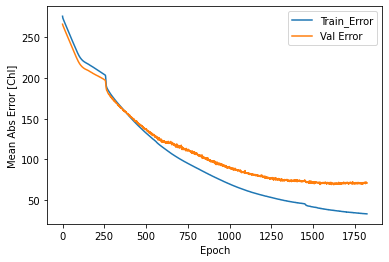

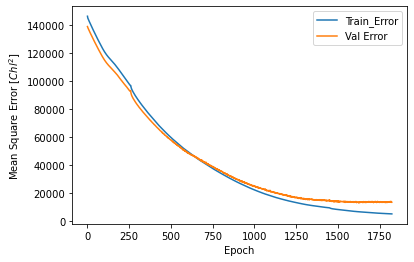

In [15]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Chl]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
   # plt.ylim([0,20])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Chl^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train_Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label='Val Error')
    plt.legend()
    #plt.ylim([0,100])
    
plot_history(history)

In [16]:
loss, mae, mse = model.evaluate(scaled_test_rand, test_labels_rand, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Chlorophyll".format(mae))

Testing set Mean Abs Error: 70.97 Chlorophyll


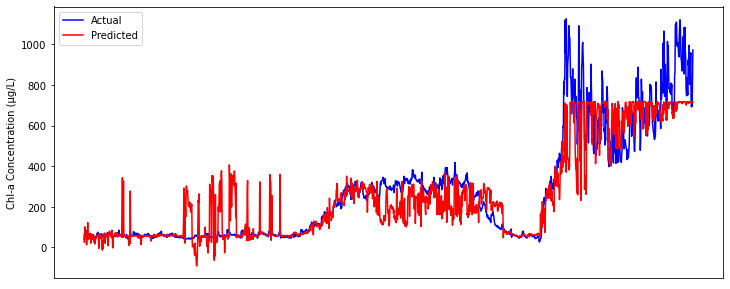

In [17]:
yhat = pd.DataFrame(model.predict(scaled_test_rand))
y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)

plt.ylabel('Chl-a Concentration (µg/L)')

plt.plot(y_actual, color='blue', label = 'Actual')

plt.plot(yhat, color='red', label = 'Predicted')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.xlabel('February to March')
plt.legend()
plt.show()

In [18]:
from math import sqrt
yhat = model.predict(scaled_test_rand)
yhat_trn = model.predict(scaled_train_rand)
# calculate RMSE
rmse = sqrt(mean_squared_error(test_labels_rand, yhat))
print('Test RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(train_labels_rand, yhat_trn))
print('Train RMSE: %.3f' % rmse)

print('Test R2 Score: ', r2_score(test_labels_rand, yhat))

print('Train R2 Score: ', r2_score(train_labels_rand, yhat_trn))

Test RMSE: 115.931
Train RMSE: 70.929
Test R2 Score:  0.8027590881268349
Train R2 Score:  0.9283295711030172


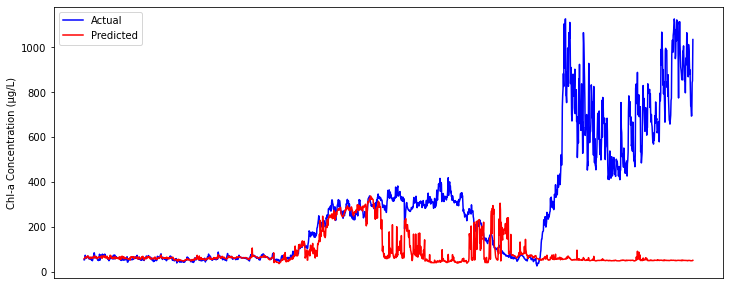

In [342]:
#Save Model for later use
#model.save('mlp_whole_dataset')
model2 = keras.models.load_model('mlp_feb_mar')

yhat = pd.DataFrame(model2.predict(scaled_test_rand))
y_actual = pd.DataFrame(test_labels_rand)

plt.figure(figsize=(12,5))
#plt.xlabel('Actual vs Predicted Chl-a')
#plt.xticks(predicted_y, predicted_y.index.values)


plt.ylabel('Chl-a Concentration (µg/L)')





plt.plot(y_actual, color='blue', label = 'Actual')
plt.plot(yhat, color='red', label = 'Predicted')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.legend()
plt.show()